# Set up

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn for plots

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display all output

# Load Data

In [2]:
tr1 = pd.read_csv("train_format1.csv")
tr2 = pd.read_csv("train_format2.csv")
info = pd.read_csv('user_info_format1.csv')
log = pd.read_csv('user_log_format1.csv')

# Exploratory data anlaysis

## Head()

In [34]:
tr1.head()
tr2.head()
info.head()
log.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


,user_id,age_range,gender,merchant_id,label,activity_log
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3


,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


## Shape

In [35]:
tr1.shape
tr2.shape
info.shape
log.shape

(260864, 3)

(7030723, 6)

(424170, 3)

(54925330, 7)

## info

In [41]:
tr1.info()
tr1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
user_id        260864 non-null int64
merchant_id    260864 non-null int64
label          260864 non-null int64
dtypes: int64(3)
memory usage: 6.0 MB


user_id        0
merchant_id    0
label          0
dtype: int64

In [45]:
tr2.info()
tr2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030723 entries, 0 to 7030722
Data columns (total 6 columns):
user_id         int64
age_range       float64
gender          float64
merchant_id     int64
label           int64
activity_log    object
dtypes: float64(2), int64(3), object(1)
memory usage: 321.8+ MB


user_id             0
age_range       19380
gender          61712
merchant_id         0
label               0
activity_log     2975
dtype: int64

tr2_NAN value
 - age_range : 19380
 - gender : 61712
 - activity_log : 2975

In [43]:
info.info()
info.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424170 entries, 0 to 424169
Data columns (total 3 columns):
user_id      424170 non-null int64
age_range    421953 non-null float64
gender       417734 non-null float64
dtypes: float64(2), int64(1)
memory usage: 9.7 MB


user_id         0
age_range    2217
gender       6436
dtype: int64

info_NAN value
 - age_range : 2217
 - gender : 6436

In [44]:
log.info()
log.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
user_id        int64
item_id        int64
cat_id         int64
seller_id      int64
brand_id       float64
time_stamp     int64
action_type    int64
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

log_NAN value
 - brand_id : 91015

# Visualization

Categorical feature
 - label
 - gender
 - age_range
 - action type

## Bar chart by gender(tr2)

In [242]:
def my_barchart(feature) : 
    female = tr2[tr2['gender'] == 0][feature].value_counts()
    male = tr2[tr2['gender']== 1][feature].value_counts()
    other = tr2[tr2['gender']== 2][feature].value_counts()
    df = pd.DataFrame([female, male, other])
    df.index = ['Female', 'Male', 'Other']
    df.plot(kind = 'bar', figsize = (10,5))

### Age range

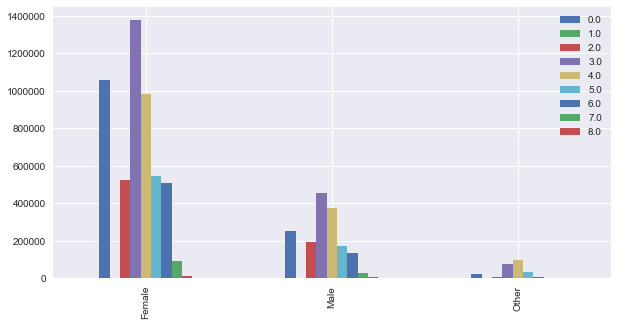

In [66]:
my_barchart('age_range')

 - 여자는 Age range 3이 가장 많이 구매 (Top3 : 3>0>4)
 - 남자는 Age range 3이 가장 많이 구매 (Top3 : 3>4>>0)
 - 여자가 더 많이 구매

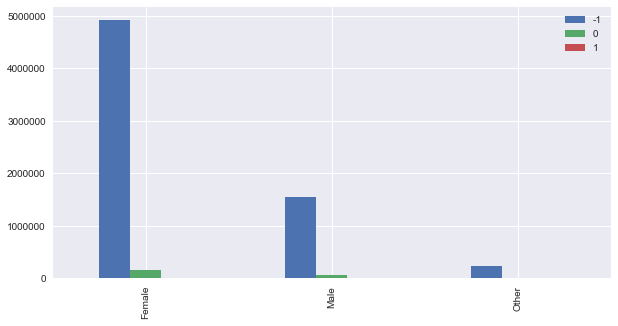

In [67]:
my_barchart('label')

 - 초기구입자가 월등히 많다 (label -1)

# Feature Engineering

## User id 구매 횟수별로 매핑

Title map
 - '#purch' <= 100 : 0
 - '#purch' > 100 & '#purch' <= 200 : 1
 - '#purch' > 200 & '#purch' <= 300 : 2
 - '#purch' > 300 & '#purch' <= 400 : 3
 - '#purch' > 400 & '#purch' <= 500 : 4
 - '#purch' > 500 & '#purch' <= 600 : 5
 - '#purch' > 600 & '#purch' <= 700 : 6
 - '#purch' > 700 & '#purch' <= 800 : 7
 - '#purch' > 800 & '#purch' <= 900 : 8
 - '#purch' > 900 & '#purch' <= 1100 : 9

In [236]:
purch = tr2['user_id'].value_counts().reset_index()
purch.columns = ['user_id', 'numofpurch']
purch.head()

,user_id,numofpurch
0,131476,1049
1,185538,828
2,181513,812
3,306686,777
4,383810,769


In [237]:
tr2_purch = pd.merge(tr2, purch, on = 'user_id')

In [238]:
tr2_purch.head()

,user_id,age_range,gender,merchant_id,label,activity_log,numofpurch
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0,109
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...,109
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...,109
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0,109
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3,109


In [239]:
tr2_purch.loc[tr2_purch['numofpurch']<= 100 , 'numofpurch'] = 0
tr2_purch.loc[(tr2_purch['numofpurch']>100) & (tr2_purch['numofpurch']<=200), 'numofpurch'] = 1
tr2_purch.loc[(tr2_purch['numofpurch']>200) & (tr2_purch['numofpurch']<=300), 'numofpurch'] = 2
tr2_purch.loc[(tr2_purch['numofpurch']>300) & (tr2_purch['numofpurch']<=400), 'numofpurch'] = 3
tr2_purch.loc[(tr2_purch['numofpurch']>400) & (tr2_purch['numofpurch']<=500), 'numofpurch'] = 4
tr2_purch.loc[(tr2_purch['numofpurch']>500) & (tr2_purch['numofpurch']<=600), 'numofpurch'] = 5
tr2_purch.loc[(tr2_purch['numofpurch']>600) & (tr2_purch['numofpurch']<=700), 'numofpurch'] = 6
tr2_purch.loc[(tr2_purch['numofpurch']>700) & (tr2_purch['numofpurch']<=800), 'numofpurch'] = 7
tr2_purch.loc[(tr2_purch['numofpurch']>800) & (tr2_purch['numofpurch']<=900), 'numofpurch'] = 8
tr2_purch.loc[(tr2_purch['numofpurch']>900) & (tr2_purch['numofpurch']<=1100), 'numofpurch'] = 9

In [240]:
tr2_purch.head()

,user_id,age_range,gender,merchant_id,label,activity_log,numofpurch
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0,1
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...,1
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...,1
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0,1
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3,1


In [244]:
def my_barchart2(feature) : 
    female = tr2_purch[tr2_purch['gender'] == 0][feature].value_counts()
    male = tr2_purch[tr2_purch['gender']== 1][feature].value_counts()
    other = tr2_purch[tr2_purch['gender']== 2][feature].value_counts()
    df = pd.DataFrame([female, male, other])
    df.index = ['Female', 'Male', 'Other']
    df.plot(kind = 'bar', figsize = (10,5))

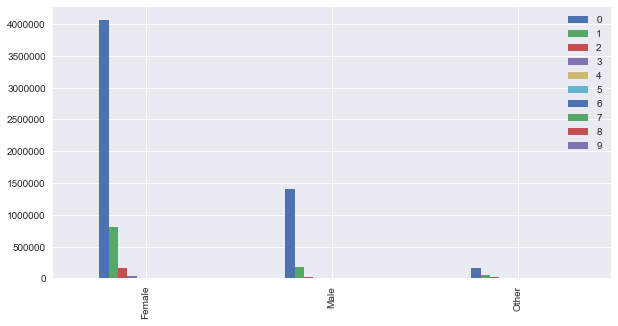

In [245]:
my_barchart2('numofpurch')

 - 100회 이하 구매한 사람이 가장 많다

In [73]:
log['time_stamp'].sort_values()

12924744     511
31500796     511
38789235     511
31500799     511
16010473     511
14126628     511
14126627     511
28233697     511
28233696     511
37458916     511
7338453      511
24471249     511
35522167     511
37044616     511
37044625     511
37044626     511
50206347     511
26849988     511
29511615     511
37044647     511
31500795     511
43685576     511
48493434     511
5481984      511
1481274      511
5481985      511
47776076     511
20540896     511
5481986      511
46433704     511
            ... 
5172005     1112
1534196     1112
54677885    1112
18366709    1112
13068908    1112
27588044    1112
29109390    1112
5472573     1112
27135207    1112
9675598     1112
25745446    1112
19712044    1112
18229825    1112
6829989     1112
21727079    1112
25412761    1112
37181273    1112
21982733    1112
31930982    1112
30245729    1112
48820846    1112
10414269    1112
11532164    1112
5400591     1112
39635650    1112
1521375     1112
6460004     1112
14727895    11

 - Timestamp : 5월~11월

In [75]:
log['time_stamp'].sort_values().value_counts()

1111    10582633
1110     2940826
1109     1207273
1108      968099
1107      857846
1106      816861
1105      750696
1104      713245
1103      608543
1101      578776
1102      577250
626       550959
1031      540174
1030      536699
1028      368445
1029      366793
909       363524
1021      340836
617       339845
1025      329993
627       326316
1024      321046
1023      318679
828       317903
1022      316539
1016      308422
1017      303199
1018      300843
628       295877
925       289492
          ...   
611       146090
809       145719
919       140998
630       139748
817       139633
802       139240
818       137450
721       137067
612       134796
713       133892
714       132081
720       131491
811       131490
706       129921
707       129841
727       126743
810       126092
728       124547
803       122876
804       119095
514        24388
515        24113
513        23730
516        23022
517        21446
512        20704
511        20044
518        192

 - 11월1일부터 11월11까지 가장 흥하고 (11월11일 피크)
 - 11월 12일 급감

In [4]:
type(log['time_stamp'])

pandas.core.series.Series

In [13]:
log_month = log.time_stamp.apply(str)

In [14]:
month = log_month.replace(log_month[-2:], "")

In [16]:
month[0]

'829'

In [ ]:
for number in month : 
    

In [10]:
type(month)

pandas.core.series.Series

In [11]:
my_month = pd.DataFrame(month)

In [12]:
my_month.head()

,time_stamp
0,829
1,829
2,829
3,829
4,829


In [74]:
log['cat_id'].sort_values()

6571053        1
47211517       1
14313243       1
52814563       1
52814573       1
7003152        1
24344969       1
19332216       1
19332221       1
19332227       1
50561626       1
25378592       1
26523109       1
25378617       1
40162          1
33438459       1
33438455       1
40165          1
8638996        1
51330925       1
48882632       1
5165052        1
27108142       1
29740328       1
11920067       1
30316569       1
71453          1
18741713       1
41018597       1
41018596       1
            ... 
39162307    1671
37203284    1671
1414313     1671
35605024    1671
2281057     1671
2281059     1671
2281061     1671
2281062     1671
2281063     1671
2281065     1671
35605154    1671
44599986    1671
33229134    1671
38939349    1671
8547110     1671
35605006    1671
11652435    1671
38939337    1671
38939335    1671
38939323    1671
33229133    1671
33229129    1671
35605136    1671
16657778    1671
32791604    1671
33229128    1671
20383465    1671
35605040    16

 - category 1671개

In [77]:
log['cat_id'].sort_values().value_counts()

662     4339025
737     1749753
1505    1724239
389     1621736
656     1538969
1349    1374482
1142    1265446
602     1248070
1577    1216159
1095    1155256
1438     933702
177      932113
407      879524
821      864373
1553     848239
1467     796754
302      769658
1075     723725
1238     712257
1208     711145
1188     698996
664      673125
1213     663906
1271     660025
1389     612536
1397     608386
1023     600386
420      571924
351      570235
267      520355
         ...   
899           1
92            1
879           1
473           1
881           1
232           1
1351          1
1473          1
482           1
856           1
961           1
105           1
146           1
487           1
1487          1
263           1
1002          1
1618          1
1275          1
98            1
341           1
449           1
625           1
336           1
334           1
1364          1
920           1
572           1
1012          1
1182          1
Name: cat_id, Length: 16

cat_id
 - 662 : 4339025번
 - 737 : 1749753번
 - 1505 : 1724239번